In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [5]:
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [6]:
# Feature selection
# correlation analysis
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


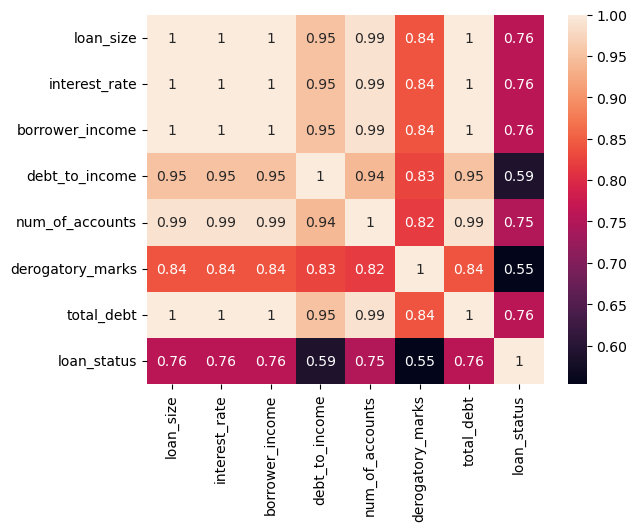

In [7]:
sns.heatmap(corrs, annot=True)
plt.show()

In [8]:
abs(corrs.loan_status).sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

In [9]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [10]:
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

In [ ]:
# SCALE the NUMERIC Features FIRST

# subset
#df_sub = df.loc[:, features]

# initialize
#scaler = StandardScaler()

# fit
#scaler.fit(df_sub)

# predict/transform
#scaled_data = scaler.transform(df_sub)
#df_scaled = pd.DataFrame(scaled_data, columns=features)

#df_scaled.head()

In [ ]:
df_scaled.describe()

In [11]:
# Step 1: Get the data
X = df
y = df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages

In [13]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[56277     0]
 [    0  1875]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       1.00      1.00      1.00      1875

    accuracy                           1.00     58152
   macro avg       1.00      1.00      1.00     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18759     0]
 [    0   625]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       1.00      1.00      1.00       625

    accuracy                           1.00     19384
   macro avg       1.00      1.00      1.00     19384
weighted avg       1.00      1.00      1.00     19384

    


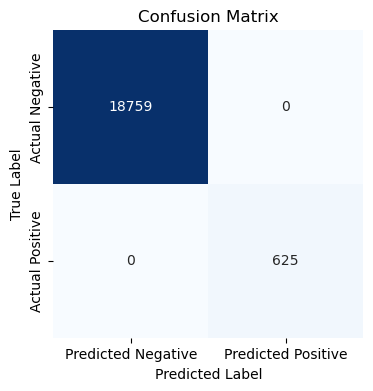

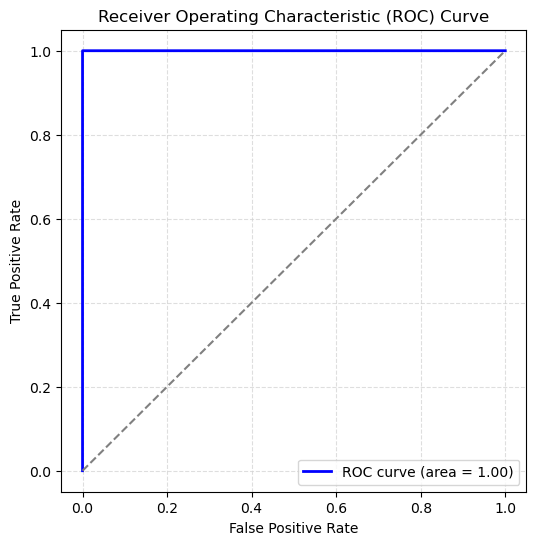

In [14]:
 # Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [15]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.copy()
X.drop("loan_status", axis=1, inplace=True)

In [16]:
# Review the y variable Series
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64

In [17]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [19]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [20]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [21]:
# Generate a confusion matrix for the model
confusion_matrix(predictions,y_test)

array([[18663,    56],
       [  102,   563]], dtype=int64)

In [22]:
# Print the classification report for the model
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18719
           1       0.91      0.85      0.88       665

    accuracy                           0.99     19384
   macro avg       0.95      0.92      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** It looks like the model does a good job predicting for the healthy and high-risk loans. It seems to do a strong job predicting healthy loans, and does a good job with high-risk loans, though it's not as strong as the healthy lones when you see the lower recall and f-1 score for the high-risk label. 

---